
Erro médio quadrático: 59561.60

Coeficientes do modelo:
Intercept: 781.71
Coeficientes: [ 19.90959617 263.94360666]

Modelo:
Preço = 781.71 + 19.91*Area + 263.94*Quartos

Erro médio quadrático:
59561.59527860783


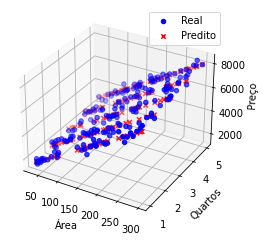

In [6]:
# Usando regressão linear para prever o preço
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df_com_ruido = pd.read_csv('../Data/Aluguel/aluguel_duas_variaveis_com_ruido.csv')

# Separando os dados em treino e teste
X = df_com_ruido[['Area', 'Quartos']]
y = df_com_ruido['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Calculando o erro
mse = mean_squared_error(y_test, y_pred)
print(f"\nErro médio quadrático: {mse:.2f}")

# Exibindo os coeficientes
print("\nCoeficientes do modelo:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coeficientes: {model.coef_}")

# Exibindo o modelo
print("\nModelo:")
print(f"Preço = {model.intercept_:.2f} + {model.coef_[0]:.2f}*Area + {model.coef_[1]:.2f}*Quartos")

# Exibindo o erro médio quadrático
print("\nErro médio quadrático:")
print(mse)

# Plotando o modelo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_test['Area']
y = X_test['Quartos']
z = y_pred
ax.scatter(x, y, y_test, c='b', marker='o', label='Real')
ax.scatter(x, y, z, c='r', marker='x', label='Predito')
ax.set_xlabel('Área')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
plt.legend()
plt.show()
